In [ ]:
# Imports 
import sys
sys.path.append("..")
import os
os.environ["pyna_language"] = 'julia'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Compute EPNL table for different engines 
component_lst = ['all_sources']

directory_lst = ['DD', 'CSnonox', 'CSwnox']
file_name_lst = ['CFM56_Derivative_DerivModel_', 'Clean-sheet_CleanSheetModel_', 'Clean-sheet_CleanSheetModel_']

# Compute EPNL cumulative 
n_files = 11
n_sl = 101
FnFn = np.zeros((3, n_files))

epnl_sideline   = np.zeros((3, n_files, 6, n_sl))
epnl_lateral    = np.zeros((3, n_files, 6, 1))
epnl_flyover    = np.zeros((3, n_files, 6, 1))
epnl_approach   = np.zeros((3, n_files, 6, 1))
epnl_cumulative = np.zeros((3, n_files, 6, 1))


In [3]:
# Compute lateral and flyover
if False:
    for j, dir_name in enumerate(directory_lst):
        print('------ DIRECTORY --------------: ', dir_name)
        for i, file in enumerate(['0.95', '0.96', '0.97', '0.98', '0.99', '1.00', '1.01', '1.02', '1.03', '1.04', '1.05']):
            print('--- File ---: ', file)
            for c, comp in enumerate(component_lst):
                print('Component: ', comp)
                pyna_settings = pyna.load_settings(case_name = 'stca_enginedesign_standard')
                pyna_settings.save_results = False
                x_observer_lst = np.zeros((n_sl+1, 3))
                x_observer_lst[:-1, 0] = np.linspace(1000, 6000, n_sl)
                x_observer_lst[:-1, 1] = 450*np.ones(n_sl)
                x_observer_lst[:, 2] = 4*0.3048*np.ones(n_sl+1)
                x_observer_lst[-1,0] = 6500.
                pyna_settings.x_observer_array = x_observer_lst

                if comp == 'fan_inlet':
                    pyna_settings.fan_inlet = True
                    pyna_settings.fan_discharge = False
                    pyna_settings.core = False
                    pyna_settings.airframe = False
                    pyna_settings.jet_shock = False
                    pyna_settings.jet_mixing = False
                    pyna_settings.all_sources = False
                elif comp == 'fan_discharge':
                    pyna_settings.fan_inlet = False
                    pyna_settings.fan_discharge = True
                    pyna_settings.core = False
                    pyna_settings.airframe = False
                    pyna_settings.jet_shock = False
                    pyna_settings.jet_mixing = False
                    pyna_settings.all_sources = False
                elif comp == 'core':
                    pyna_settings.fan_inlet = False
                    pyna_settings.fan_discharge = False
                    pyna_settings.core = True
                    pyna_settings.airframe = False
                    pyna_settings.jet_shock = False
                    pyna_settings.jet_mixing = False
                    pyna_settings.all_sources = False
                elif comp == 'jet_mixing':
                    pyna_settings.fan_inlet = False
                    pyna_settings.fan_discharge = False
                    pyna_settings.core = False
                    pyna_settings.airframe = False
                    pyna_settings.jet_shock = False
                    pyna_settings.jet_mixing = True
                    pyna_settings.all_sources = False
                elif comp == 'jet_shock':
                    pyna_settings.fan_inlet = False
                    pyna_settings.fan_discharge = False
                    pyna_settings.core = False
                    pyna_settings.airframe = False
                    pyna_settings.jet_shock = True
                    pyna_settings.jet_mixing = False
                    pyna_settings.all_sources = False
                elif comp == 'airframe':
                    pyna_settings.fan_inlet = False
                    pyna_settings.fan_discharge = False
                    pyna_settings.core = False
                    pyna_settings.airframe = True
                    pyna_settings.jet_shock = False
                    pyna_settings.jet_mixing = False
                    pyna_settings.all_sources = False
                elif comp == 'all_sources':
                    pyna_settings.fan_inlet = True
                    pyna_settings.fan_discharge = True
                    pyna_settings.core = True
                    pyna_settings.airframe = True
                    pyna_settings.jet_shock = True
                    pyna_settings.jet_mixing = True
                    pyna_settings.all_sources = True

                pyna_settings.observer_lst = ('contours', )
                pyna_settings.levels_int_metric='epnl'
                pyna_settings.engine_file_name = 'takeoff/' + dir_name + '/' + file_name_lst[j] + file + '.csv'
                pyna_settings.trajectory_file_name = 'Trajectory_to.csv'

                py = pyna(pyna_settings)
                py.compute_noise_time_series()

                FnFn[j,i] = np.float64(file)

                epnl_sideline[j,i, c, :] = py.problem.get_val('noise.epnl')[:-1]
                epnl_lateral[j,i, c, :] = np.max(epnl_sideline[j,i, c, :])
                epnl_flyover[j,i, c, :] = py.problem.get_val('noise.epnl')[-1]

    np.save('epnl_sideline.npy', epnl_sideline  )
    np.save('epnl_lateral.npy', epnl_lateral   )
    np.save('epnl_flyover.npy', epnl_flyover   )
    np.save('epnl_approach.npy', epnl_approach  )
    np.save('epnl_cumulative.npy', epnl_cumulative)

------ DIRECTORY --------------:  DD
--- File ---:  0.95
Component:  all_sources


/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, /Users/laurensvoet/Documents/Research/pyNA/pyNA/cases/stca_enginedesign_standard/dymos_solution.db, is being overwritten.


Model viewer data has already has already been recorded for Driver.
--- File ---:  0.96
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  0.97
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  0.98
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  0.99
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  1.00
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  1.01
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  1.02
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  1.03
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  1.04
Component:  all_

In [20]:
epnl_sideline = np.load('epnl_sideline.npy')
epnl_lateral = np.load('epnl_lateral.npy')
epnl_flyover = np.load('epnl_flyover.npy')
epnl_approach = np.load('epnl_approach.npy')
epnl_cumulative = np.load('epnl_cumulative.npy')

In [4]:
if False:
    # Compute approach
    for j, dir_name in enumerate(directory_lst):
        print('------ DIRECTORY --------------: ', dir_name)
        for i, file in enumerate(['0.95', '0.96', '0.97', '0.98', '0.99', '1.00', '1.01', '1.02', '1.03', '1.04', '1.05']):
            print('--- File ---: ', file)
            for c, comp in enumerate(component_lst):
                print('Component: ', comp)

                pyna_settings = pyna.load_settings(case_name = 'stca_enginedesign_standard')
                pyna_settings.save_results = False

                x_observer_lst = np.array([[-2291, 0, 4*0.3048]])
                pyna_settings.x_observer_array = x_observer_lst

                if comp == 'fan_inlet':
                    pyna_settings.fan_inlet = True
                    pyna_settings.fan_discharge = False
                    pyna_settings.core = False
                    pyna_settings.airframe = False
                    pyna_settings.jet_shock = False
                    pyna_settings.jet_mixing = False
                    pyna_settings.all_sources = False
                elif comp == 'fan_discharge':
                    pyna_settings.fan_inlet = False
                    pyna_settings.fan_discharge = True
                    pyna_settings.core = False
                    pyna_settings.airframe = False
                    pyna_settings.jet_shock = False
                    pyna_settings.jet_mixing = False
                    pyna_settings.all_sources = False
                elif comp == 'core':
                    pyna_settings.fan_inlet = False
                    pyna_settings.fan_discharge = False
                    pyna_settings.core = True
                    pyna_settings.airframe = False
                    pyna_settings.jet_shock = False
                    pyna_settings.jet_mixing = False
                    pyna_settings.all_sources = False
                elif comp == 'jet_mixing':
                    pyna_settings.fan_inlet = False
                    pyna_settings.fan_discharge = False
                    pyna_settings.core = False
                    pyna_settings.airframe = False
                    pyna_settings.jet_shock = False
                    pyna_settings.jet_mixing = True
                    pyna_settings.all_sources = False
                elif comp == 'jet_shock':
                    pyna_settings.fan_inlet = False
                    pyna_settings.fan_discharge = False
                    pyna_settings.core = False
                    pyna_settings.airframe = False
                    pyna_settings.jet_shock = True
                    pyna_settings.jet_mixing = False
                    pyna_settings.all_sources = False
                elif comp == 'airframe':
                    pyna_settings.fan_inlet = False
                    pyna_settings.fan_discharge = False
                    pyna_settings.core = False
                    pyna_settings.airframe = True
                    pyna_settings.jet_shock = False
                    pyna_settings.jet_mixing = False
                    pyna_settings.all_sources = False
                elif comp == 'all_sources':
                    pyna_settings.fan_inlet = True
                    pyna_settings.fan_discharge = True
                    pyna_settings.core = True
                    pyna_settings.airframe = True
                    pyna_settings.jet_shock = True
                    pyna_settings.jet_mixing = True
                    pyna_settings.all_sources = True

                pyna_settings.observer_lst = ('contours', )
                pyna_settings.levels_int_metric='epnl'
                pyna_settings.engine_file_name = 'approach/' + dir_name + '/' + file_name_lst[j] + file + '.csv'
                pyna_settings.trajectory_file_name = 'Trajectory_app.csv'

                py = pyna(pyna_settings)
                py.compute_noise_time_series()

                FnFn[j,i] = np.float64(file)

                epnl_approach[j,i, c, :] = py.problem.get_val('noise.epnl')[0]

    epnl_cumulative = epnl_lateral + epnl_flyover + epnl_approach

    if True:            
        np.save('epnl_sideline.npy', epnl_sideline  )
        np.save('epnl_lateral.npy', epnl_lateral   )
        np.save('epnl_flyover.npy', epnl_flyover   )
        np.save('epnl_approach.npy', epnl_approach  )
        np.save('epnl_cumulative.npy', epnl_cumulative)

------ DIRECTORY --------------:  DD
--- File ---:  0.95
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  0.96
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  0.97
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  0.98
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  0.99
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  1.00
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  1.01
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  1.02
Component:  all_sources
Model viewer data has already has already been recorded for Driver.
--- File ---:  1.03
Component:  all_sources
Model viewer data has a

In [69]:
for j, dir_name in enumerate(directory_lst):
    print( epnl_cumulative[j,:,-1,:].flatten())

[277.28493269 277.83450084 278.43314585 279.03526463 279.62226096
 280.20429327 280.82883507 281.45714002 282.23519773 283.06394437
 283.97135297]
[276.19729897 276.74388907 277.26222996 277.73227027 278.31522433
 278.83817227 279.37865501 279.94080268 280.42487415 281.09877249
 281.87093277]
[277.01894737 277.51635393 278.11513926 278.52983524 279.04013635
 279.53201753 280.08637223 280.64282859 281.23820628 281.97936068
 282.70038764]


Text(0, 0.5, '$EPNL_{cumulative}$ [EPNdB]')

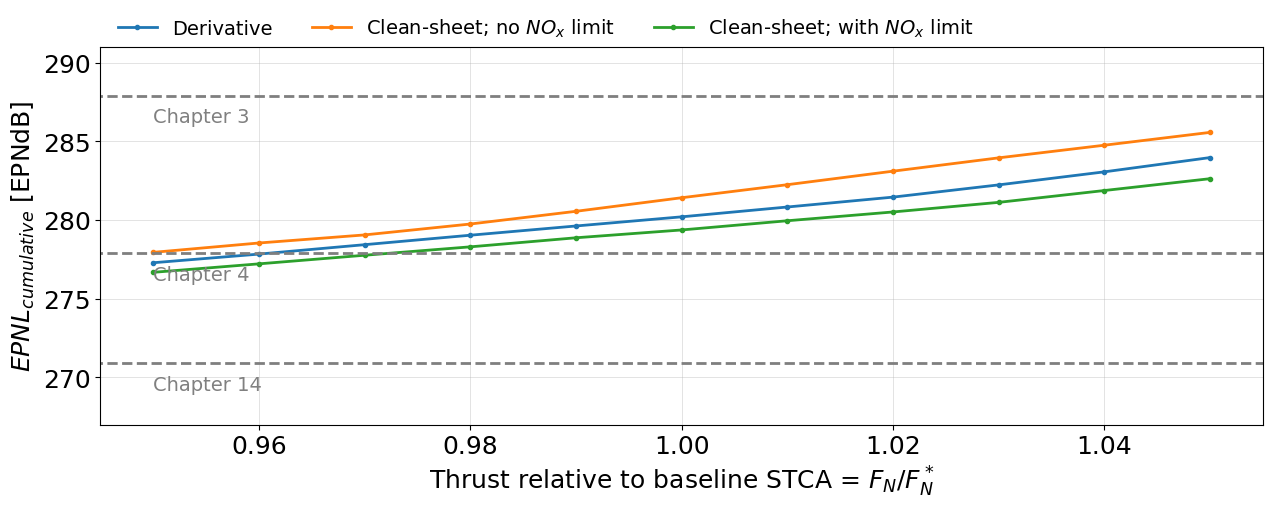

In [6]:
labels_curves = ['Derivative', 'Clean-sheet; no $NO_x$ limit', 'Clean-sheet; with $NO_x$ limit']

directory_lst = ['DD', 'CSnonox', 'CSwnox']

plt.figure(figsize=(15,5))
plt.style.use('../utils/plot.mplstyle')
for j, dir_name in enumerate(directory_lst):
    plt.plot(FnFn[j,:], epnl_cumulative[j,:,0,:], '-o', label=labels_curves[j])
    
plt.legend(fontsize=14, loc='center left', ncol=3, bbox_to_anchor=(0.0, 1.05), frameon=False)
plt.plot([0.94, 1.06], [287.9, 287.9], '--', color='tab:grey', label='Chapter 3')
plt.plot([0.94, 1.06], [277.9, 277.9], '--', color='tab:grey', label='Chapter 4')
plt.plot([0.94, 1.06], [270.9, 270.9], '--', color='tab:grey', label='Chapter 14')

plt.annotate(xy=[0.95, 269.2], s='Chapter 14', fontsize=14, color='grey')
plt.annotate(xy=[0.95, 276.2], s='Chapter 4', fontsize=14, color='grey')
plt.annotate(xy=[0.95, 286.2], s='Chapter 3', fontsize=14, color='grey')

# plt.plot([1.0, 280], 'ks', markersize=8)
# plt.annotate(xy=[0.993, 281.], s='NASA STCA', fontsize=14)

plt.xlim([0.945, 1.055])
plt.ylim([267, 291])
plt.xlabel('Thrust relative to baseline STCA = $F_N$/$F_N^*$')
plt.ylabel('$EPNL_{cumulative}$ [EPNdB]')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
DD = [277.28498435, 277.83449685, 278.43321738, 279.03526281, 279.62230053, 280.2042378, 280.8288436, 281.45709095, 282.23500421, 283.0637358, 283.97126469]
CSnonox = [277.94583403, 278.54055029, 279.05394929, 279.74679887, 280.55505309, 281.41791876, 282.24672324, 283.10625207, 283.95424367, 284.75739585, 285.5724271 ]
CSwnox = [276.67546923, 277.214626, 277.76174437, 278.29605879, 278.87230511, 279.36965796, 279.95485649, 280.51329392, 281.12401373, 281.87660591, 282.62903022]

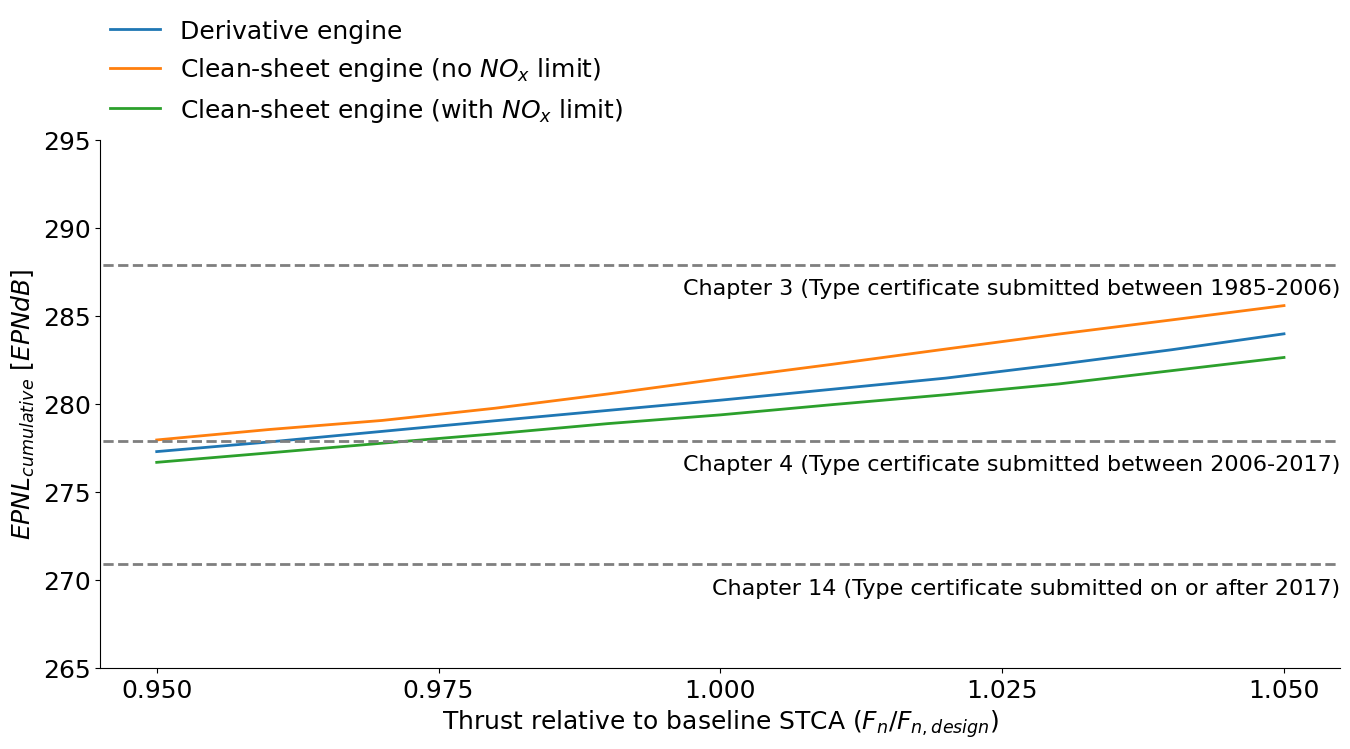

In [22]:
fig, ax = plt.subplots(1,1, figsize=(16,7))
plt.style.use('../utils/plot.mplstyle')
ax.plot(np.linspace(0.95, 1.05, 11), DD, '-', markersize=7, label='Derivative engine')
ax.plot(np.linspace(0.95, 1.05, 11), CSnonox, '-', markersize=7, label='Clean-sheet engine (no $NO_x$ limit)')
ax.plot(np.linspace(0.95, 1.05, 11), CSwnox, '-', markersize=7, label='Clean-sheet engine (with $NO_x$ limit)')

ax.plot([0.94, 1.06], [287.9, 287.9], '--', color='tab:grey')
ax.plot([0.94, 1.06], [277.9, 277.9], '--', color='tab:grey')
ax.plot([0.94, 1.06], [270.9, 270.9], '--', color='tab:grey')

# plt.fill_between([0.945, 1.055], [287.9, 287.9], [287.9+1.5, 287.9+1.5], facecolor='gray', alpha=0.2)
# plt.fill_between([0.945, 1.055], [277.9, 277.9], [277.9+1.5, 277.9+1.5], facecolor='gray', alpha=0.2)
# plt.fill_between([0.945, 1.055], [270.9, 270.9], [270.9+1.5, 270.9+1.5], facecolor='gray', alpha=0.2)

ax.annotate(xy=[1.055, 269.2], s='Chapter 14 (Type certificate submitted on or after 2017)', fontsize=16, color='k', ha='right')
ax.annotate(xy=[1.055, 276.2], s='Chapter 4 (Type certificate submitted between 2006-2017)', fontsize=16, color='k', ha='right')
ax.annotate(xy=[1.055, 286.2], s='Chapter 3 (Type certificate submitted between 1985-2006)', fontsize=16, color='k', ha='right')

ax.set_xticks([0.95, 0.975, 1.0, 1.025, 1.05])
ax.set_xlim([0.945, 1.055])
ax.set_ylim([265, 295])
ax.grid(False)

ax.set_xlabel('Thrust relative to baseline STCA ($F_n/F_{n, design}$)')
ax.set_ylabel('$EPNL_{cumulative}\ [EPNdB]$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc='lower left', bbox_to_anchor=(0.0, 1.01), ncol=1, borderaxespad=0, frameon=False)

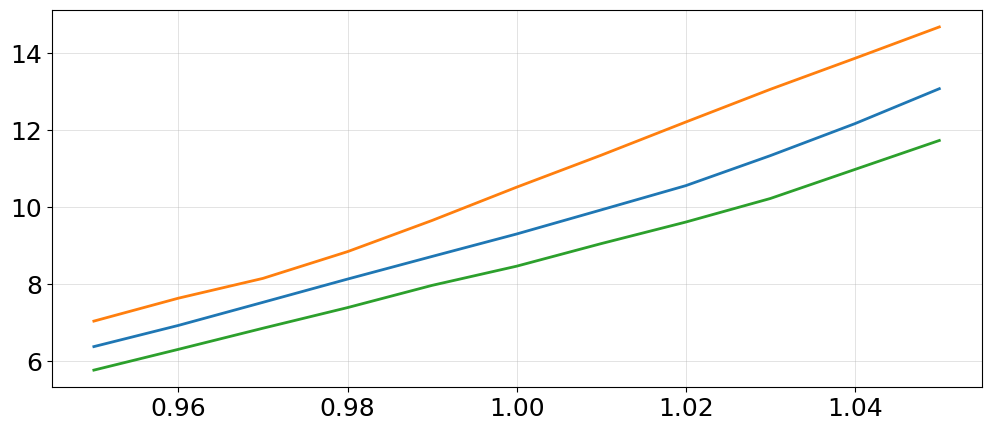

In [9]:
plt.plot(np.linspace(0.95, 1.05, 11), np.array([277.28498435, 277.83449685, 278.43321738, 279.03526281, 279.62230053, 280.2042378, 280.8288436, 281.45709095, 282.23500421, 283.0637358, 283.97126469])-270.9)
plt.plot(np.linspace(0.95, 1.05, 11), np.array([277.94583403, 278.54055029, 279.05394929, 279.74679887, 280.55505309, 281.41791876, 282.24672324, 283.10625207, 283.95424367, 284.75739585, 285.5724271 ])-270.9)
plt.plot(np.linspace(0.95, 1.05, 11), np.array([276.67546923, 277.214626, 277.76174437, 278.29605879, 278.87230511, 279.36965796, 279.95485649, 280.51329392, 281.12401373, 281.87660591, 282.62903022])-270.9)